## Background

The case study is on first price auction with its associated assumptions inferred from the backgroud provided.


#### *Problem 1*
Estimates of the expected win rate for given bid price 



In order to estimate the win rate, the following procedures were used

1. Estimate total wins recorded for bidding at a given bid price (total bid wins): This information can be retrieve from the table provided.
A simple process is to filter the data to the given bid price for which win rate is to be estimated, and select number of times (events column) a win occured (win = 1)

2. Estimate total number of times a bid was placed at a given bid price (total bids): This is estimated by filtering the data to a given bid price and finding the sum of events. This is equivalent to sum of events for both bid wins and losses for the bid price


3. Estimate win rate for a bid price to be given as (total bid wins / total bids)

The code for estimating win rate with the above steps is illustrated below;







#### Workflow for estimating win rate

Before applying the algorithm above to estimate win rate, the data needs to be read or created. In order to do this, the json for table 1, is transform into a dataframe. 

In [1]:
# import packages / modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#%% convert the json data into a dataframe
df_json = [
{"app": "A", "bid_price": 0.01, "win": 0, "events": 100000}, 
{"app": "A", "bid_price": 0.01, "win": 1, "events": 0}, 
{"app": "A", "bid_price": 0.1, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.1, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 0.2, "win": 0, "events": 8000000}, 
{"app": "A", "bid_price": 0.2, "win": 1, "events": 2000000}, 
{"app": "A", "bid_price": 0.4, "win": 0, "events": 700000}, 
{"app": "A", "bid_price": 0.4, "win": 1, "events": 300000}, 
{"app": "A", "bid_price": 0.5, "win": 0, "events": 80000}, 
{"app": "A", "bid_price": 0.5, "win": 1, "events": 20000}, 
{"app": "A", "bid_price": 0.75, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.75, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 1, "win": 0, "events": 400}, 
{"app": "A", "bid_price": 1, "win": 1, "events": 600}, 
{"app": "A", "bid_price": 2, "win": 0, "events": 30}, 
{"app": "A", "bid_price": 2, "win": 1, "events": 70}, 
{"app": "A", "bid_price": 5, "win": 0, "events": 2}, 
{"app": "A", "bid_price": 5, "win": 1, "events": 8}, 
{"app": "A", "bid_price": 9, "win": 0, "events": 0}, 
{"app": "A", "bid_price": 9, "win": 1, "events": 1}
]

# %%
data = pd.json_normalize(data=df_json)
data


,app,bid_price,win,events
0,A,0.01,0,100000
1,A,0.01,1,0
2,A,0.10,0,7000
3,A,0.10,1,3000
4,A,0.20,0,8000000
5,A,0.20,1,2000000
6,A,0.40,0,700000
7,A,0.40,1,300000
8,A,0.50,0,80000
9,A,0.50,1,20000


In [3]:
## Function to calculate win rate

def estimate_win_rate(data: pd.DataFrame, 
                      win_column: str = 'win',
                      bid_price_column: str = 'bid_price',
                      event_column: str = 'events'
                      ) -> pd.DataFrame:
    """This function accepts the column names for the bidding outcome, bid price and number of bids 
        to compute the win rate.

    Args:
        data (pd.DataFrame): Data to be analyze.
        win_column (str, optional): Column name for bid outcome. Defaults to 'win' with values as  either a win (1) or loss (0) .
        bid_price_column (str, optional): Column name for bid price. Defaults to 'bid_price'.
        event_column (str, optional): Column name for events which is number of times a bid was made. Defaults to 'events'.

    Returns:
        pd.DataFrame: Dataframe containing win_rate column
    """
    data_win = data[(data[win_column]==1)]

    # assign column to a list comprehension that computes win rate for each bid price
    data_win['win_rate'] = [data[(data[bid_price_column]==bid) & (data[win_column]==1)]
                            [event_column].item() / data[(data[bid_price_column]==bid)][event_column].sum()
                            for bid in data["bid_price"].unique() 
                            ]
    
    return data_win



In [4]:
# use function defined above to estimate win rate
data_win_rate = estimate_win_rate(data=data)
data_win_rate

,app,bid_price,win,events,win_rate
1,A,0.01,1,0,0.0
3,A,0.10,1,3000,0.3
5,A,0.20,1,2000000,0.2
7,A,0.40,1,300000,0.3
9,A,0.50,1,20000,0.2
11,A,0.75,1,3000,0.3
13,A,1.00,1,600,0.6
15,A,2.00,1,70,0.7
17,A,5.00,1,8,0.8
19,A,9.00,1,1,1.0



The estimated win rate at various bid price is captured in the table above. The result is visualize below;











<AxesSubplot:title={'center':'Win rate at various bid price'}, xlabel='bid_price'>

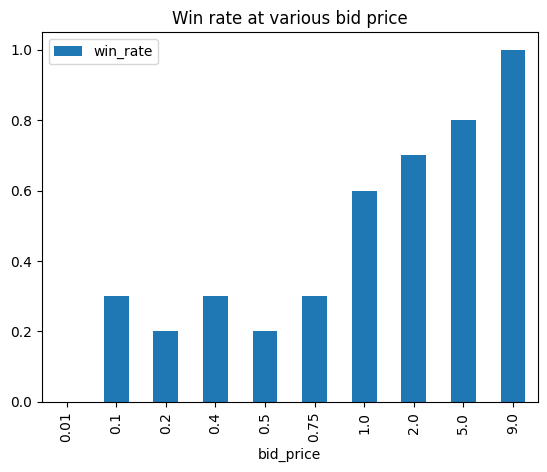

In [5]:
data_win_rate.plot(kind='bar', x='bid_price', y='win_rate', title='Win rate at various bid price')




From the estimation, there is a positive linear relationship between bid_price above 0.5 and win rate. This is expected as the higher the price that Verve bids, the more likely they will beat competing entities and the higher the likelihood of winning the auction.



The above result needs to be put in perspective. It is assumed that the number of events is representative of 
all possible occurence and outcome for a bid price. Win rate for a bid price is robust against and independent of number of events for a bid price. Thus, the sample size of the events for each  bid price is adequate and does not influence the win rate when more bids are made. This is an  assumption that is quite extreme. Example, the win rate of $1.0 which was bidded 600 times is about 60% compare  to 30% for $0.1 which was bidded 3000 times. The difference in number of times these bid prices were    bidded is assumed to not account for the difference in win rate. 







#### *Problem 2*
#### Determine the most optimal bid valuation to send in response

The question of most optimal bid price can be captured in an analytical framework as a snapshot using Situation Question Complication (SQC) as a Problem design framework below.



![](SCQ_analytical_framework.png)

### Assumptions made

In analyzing the optimal bid valuation, a number of assumptions are made in order to clearly define an algorithm that maximizes revenue.

1. In all cases, a lost will be made when the bid price is higher than the advertiser's quote

2. Revenue can only be made when a bid is successful and bid price is lower than advertiser pay

3. The relationship between net revenue and bid price on one hand, and bid price and win rate on the other hand is diametrically opposed. In other words, the higher the bid price, the higher likelihold of a win (which is a prerequiste for earning revenue) while the lower the bid price, the higher the net revenue (difference between advertisers pay and actual bid price). Thus, the search for optimal bid valuation will ideally results in the lowest bid price that will turn-out to be the highest bid price possible among competing offers to win the auction. 

4. The advertiser pay offered is deterministic of the optimal bid valuation or expected payoff. Thus, a different advertiser pay has the potential to result in a different optimal bid valuation.

5. The expected payoff which is also termed as bid valuation in this exercise is the most important indicator in determining the optimal bid price. Thus, optimal bid price is based on the highest expected payoff or bid valuation among various bid prices which results in maximum revenue

Based on the available information, optimal bid valuation is computed using parameters such as win rate and net revenue. Net revenue is defined as the differences between advertiser pay and bid price that won the auction.


Estimating the optimal bid price requires defining the advertiser's pay offered. For this, following the example provided in the question, the advertiser's pay is defined as $0.5.  This assumption automatically rules out some bidding responses. Based on the logical assumption that bid price should always be lower than the advertiser's pay in order for revenue to be made, all bid price greater than 0.5 are worst cases not considered. On this basis, optimal bid is evaluated below:


bid valuation (expected payoff) = win rate * net revenue

optimal bid valuation (expected payoff) = bid price of maximum bid valuation


The code for a class with methods for estimating the bid value and optimal bid price is provided below






In [6]:
class OptimalBidValuation:
    def __init__(self, data: pd.DataFrame):
        self.data = data
        
    ## function to estimate bid valuation for various bid prices
    def compute_bid_value(self, advertiser_pay: int=0.5, 
                    bid_price_column: str = 'bid_price', 
                    win_rate_column: str = 'win_rate') -> pd.DataFrame:
        """This function accepts advertiser pay, column names for 
        the bid price and win rate to compute the bid value which is the expected payoff.

        Args:
            advertiser_pay (int, optional): This is how much the advertiser is paying for the ad. Defaults to 0.5.
            bid_price_column (str, optional): This is a column containing the price at which a bid is made. Defaults to 'bid_price'.
            win_rate_column (str, optional): This is a column name containing the rate at which a bid price is successful. Defaults to 'win_rate'.

        Returns:
            pd.DataFrame: Dataframe containing data on advertiser pay, bid price and estimated bid value which is the expected payoff
        """
        self.advertiser_pay = advertiser_pay
        
        # estimate bid value
        self.data['bid_value'] = (advertiser_pay - self.data[bid_price_column]) * self.data[win_rate_column]
        self.data['advertiser_pay'] = advertiser_pay
        self.bid_value_data = self.data[['advertiser_pay', 'bid_price', 'bid_value']]
        return self.bid_value_data
    
    @property
    def compute_optimal_bid(self):
        """ This is an attribute that returns the optimal bid price
        """
        # select bid price with maximum bid value
        optimal_bid_price = (self.bid_value_data[self.bid_value_data['bid_value'] == 
                                                 max(self.bid_value_data['bid_value'])]
                                                ['bid_price'].item()
                            )
        return print(f'Optimal bid price to maximize net revenue based on advertiser pay of '
                     f'${self.advertiser_pay} is ${optimal_bid_price}'
                    )

With the OptimalBidValuation class, the bid value and optimal bid price is estimated as follows

In [7]:
## Initialize the class for bid valuation
optimal_bid_valuation = OptimalBidValuation(data=data_win_rate)

In [8]:
# estimate the bid value / expected payoff when advertiser pay is $0.5
optimal_bid_valuation.compute_bid_value(advertiser_pay=0.5)

,advertiser_pay,bid_price,bid_value
1,0.5,0.01,0.000
3,0.5,0.10,0.120
5,0.5,0.20,0.060
7,0.5,0.40,0.030
9,0.5,0.50,0.000
11,0.5,0.75,-0.075
13,0.5,1.00,-0.300
15,0.5,2.00,-1.050
17,0.5,5.00,-3.600
19,0.5,9.00,-8.500


From the analysis, the optimal bid value that maximizes net revenue is the bid price that produces the highest bid value. The optimal bid value is 0.12. As suggested earlier, when the bid price is higher than the advertiser price, losses will be made as evident by negative bid values for bid prices above $0.5 (assumed advertiser pay). The optimal bid price is estimated below;

In [9]:
# determine optimal bid price to send as response to auction when advertiser pay is $0.5
optimal_bid_valuation.compute_optimal_bid

Optimal bid price to maximize net revenue based on advertiser pay of $0.5 is $0.1


As indicated earlier, advertiser pay influences the net revenue to be made. To demonstrate this, a second case is studied

where the advertiser pay is assumed to be $10. With this pay, all the bid prices are lower than the advertiser pay. 

The code below is use to estimate the optimal bid valuation base on $10 advertiser pay. 




In [10]:
# estimate bid value for advertiser pay of $10
optimal_bid_valuation.compute_bid_value(advertiser_pay=10)

,advertiser_pay,bid_price,bid_value
1,10,0.01,0.000
3,10,0.10,2.970
5,10,0.20,1.960
7,10,0.40,2.880
9,10,0.50,1.900
11,10,0.75,2.775
13,10,1.00,5.400
15,10,2.00,5.600
17,10,5.00,4.000
19,10,9.00,1.000


In [11]:
# determine optimal bid price when advertiser pay is $ 10 
optimal_bid_valuation.compute_optimal_bid

Optimal bid price to maximize net revenue based on advertiser pay of $10 is $2.0


From the above estimation, it is concluded that given advertiser pay is $10, the optmal bid price to send as  response to the auction is $2.0 because it has the highest bid value or expected payoff of 5.6. This also suggest a trend that, as an advertiser offers a higher pay, higher bid price may become more profitable as they come with higher win rate or likelihood of being selected among competing bids. At higher advertiser pay, the potential higher revenue to be gained by bidding with lower bid price (with lower chances of winning the bid) is offset by a higher bid price that maximizes win rate with a lower marginal revenue. 


In order to understand how advertiser pay influences optimal bid price, value and strategy, an interactive platform is required. This is provided by a simple web application from which an advertiser pay can be selected and the optimal bid price to send is determined. Thus, a Proof of Concept (POC) is developed and deployed.




The link to access the app is:   http://optimalbidder.pythonanywhere.com/
